# Visualisation of age estimation distribution for all data sets


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
import numpy as np

# Set the working directory to the src folder
os.chdir('/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data')


### Loading data

In [17]:
def load_data(path):
    f = open(path)
    data = json.load(f)
    df = pd.DataFrame.from_dict(data, orient='index', columns=['Age'])
    f.close()

    # removing nans
    nans = df['Age'].isna().sum()
    df = df.dropna()

    describe = df.describe()
    value_counts = df.value_counts()

    # make new column for the identity based on the index
    df['Identity'] = df.index
    df['Identity'] = df.index.str.rsplit('_', 1).str[0]

    df = df.sort_values(by='Age')

    return df, nans, describe, value_counts


In [18]:
df_YLFW = load_data('age_estimations/YLFW_output_data_precroped_all_age.json')[0]
df_YLFW.Age = df_YLFW.Age.astype(int)
df_YLFW = df_YLFW.sort_values(by='Age', ascending=True)

# df_LFW = load_data('age_estimations/LFW_output_lfw_complete_all_images_age.json')[0]
# df_LFW.Age = df_LFW.Age.astype(int)
# df_LFW = df_LFW.sort_values(by='Age', ascending=True)


df_RFW_african = load_data('age_estimations/data sendt fra Gabi senest/output_african.json')[0]
df_RFW_asian = load_data('age_estimations/data sendt fra Gabi senest/output_asian.json')[0]
df_RFW_caucasian = load_data('age_estimations/data sendt fra Gabi senest/output_caucasian.json')[0]
df_RFW_indian = load_data('age_estimations/data sendt fra Gabi senest/output_indian.json')[0]
df_RFW = pd.concat([df_RFW_african, df_RFW_asian, df_RFW_caucasian, df_RFW_indian])
df_RFW.Age = df_RFW.Age.astype(int)
df_RFW = df_RFW.sort_values(by='Age', ascending=True)


# How many of each identity

3.0338593030900722

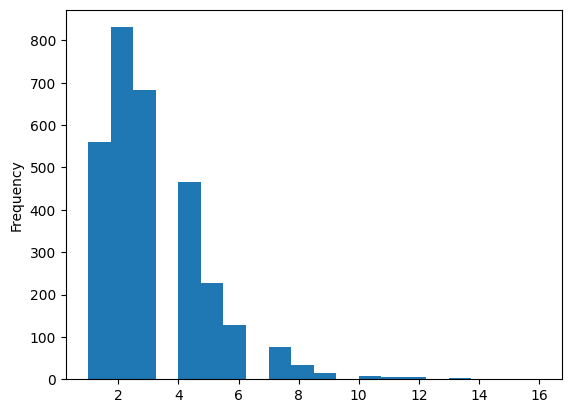

In [19]:
df_YLFW['Identity'].value_counts()
# plot amount of the same identity
df_YLFW['Identity'].value_counts().plot(kind='hist', bins=20)
df_YLFW['Identity'].describe()
df_YLFW['Identity'].value_counts().mean()

3.5430974071478625

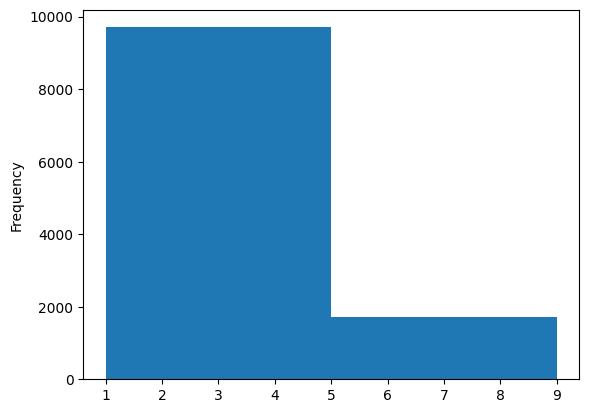

In [20]:
df_RFW['Identity'].value_counts()
# plot amount of the same identity
df_RFW['Identity'].value_counts().plot(kind='hist', bins=2)
df_RFW['Identity'].describe()
df_RFW['Identity'].value_counts().mean()

## Plotting the distribution

In [21]:
def plot_demographic_distribution(df, column="Age", bins=30, color="skyblue", figsize=(10, 6)):
    """
    Plots an improved histogram with a kernel density estimate for the specified column.

    Parameters:
    - df: Pandas DataFrame.
    - column: str, default "Age"
        The column name to be used for the histogram.
    - bins: int, default 30
        The number of bins to use for the histogram.
    - color: str, default "skyblue"
        The color of the histogram bars.
    - figsize: tuple, default (10, 6)
        The dimensions for the figure size.
    """
    plt.figure(figsize=figsize)  # Set figure size
    sns.histplot(data=df, x=column, bins=bins, color=color, kde=True)  # Histogram with KDE
    plt.title(f"{column} Distribution - Improved")  # Dynamic title based on the column name
    plt.xlabel(column)  # Label for the x-axis
    plt.ylabel("Count")  # Label for the y-axis
    plt.xticks(rotation=-45)  # Rotate x-axis labels
    plt.grid(False)  # Disable grid lines for cleaner look

    # Improve the layout and show the plot
    plt.tight_layout()
    plt.show()


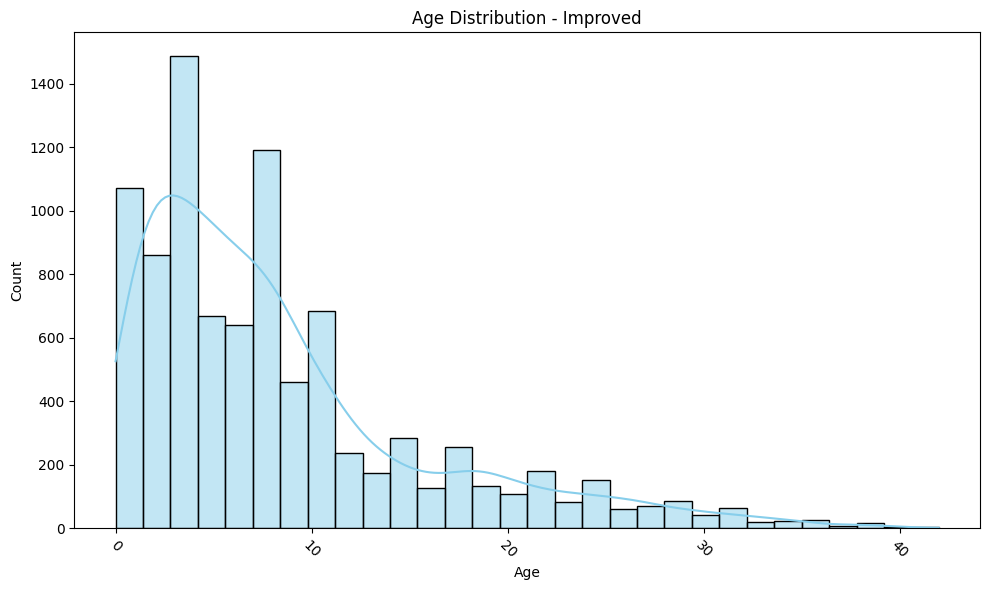

In [22]:
plot_demographic_distribution(df_YLFW, column="Age", bins=30, color="skyblue", figsize=(10, 6))

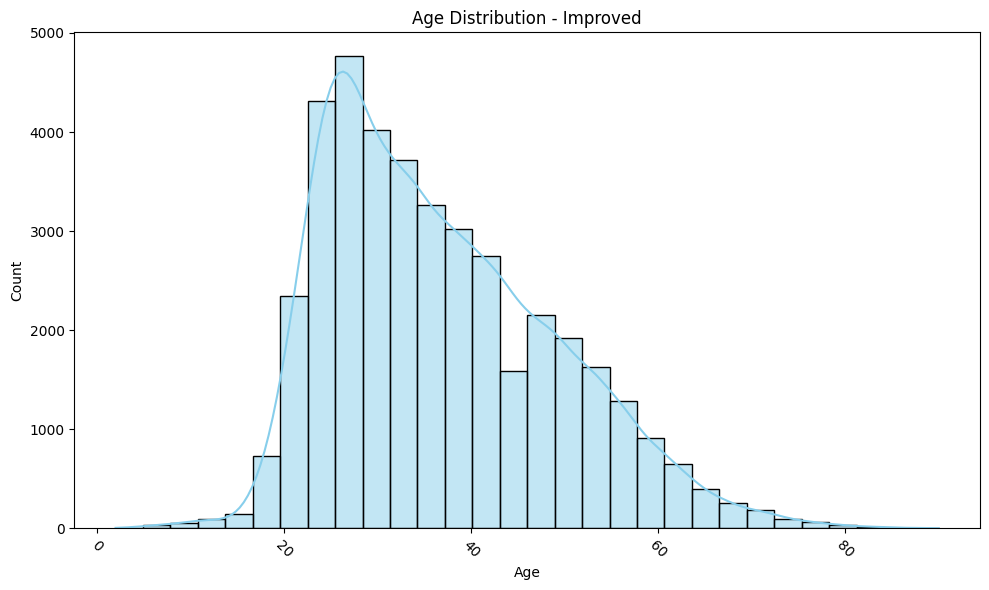

In [23]:
plot_demographic_distribution(df_RFW, column="Age", bins=30, color="skyblue", figsize=(10, 6))

### Childrens ages

In [24]:
def plot_age_group_distribution(df, figsize=(10, 6)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
    age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x='Age Group', palette='coolwarm')
    plt.title("Age Group Distribution")
    plt.xlabel("Age Group")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()


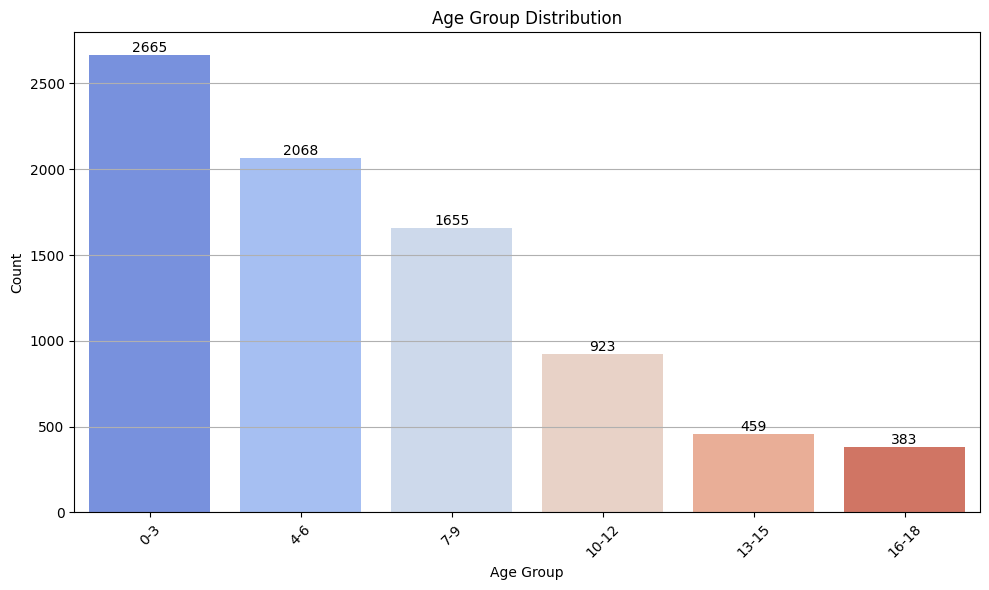

In [25]:
plot_age_group_distribution(df_YLFW)

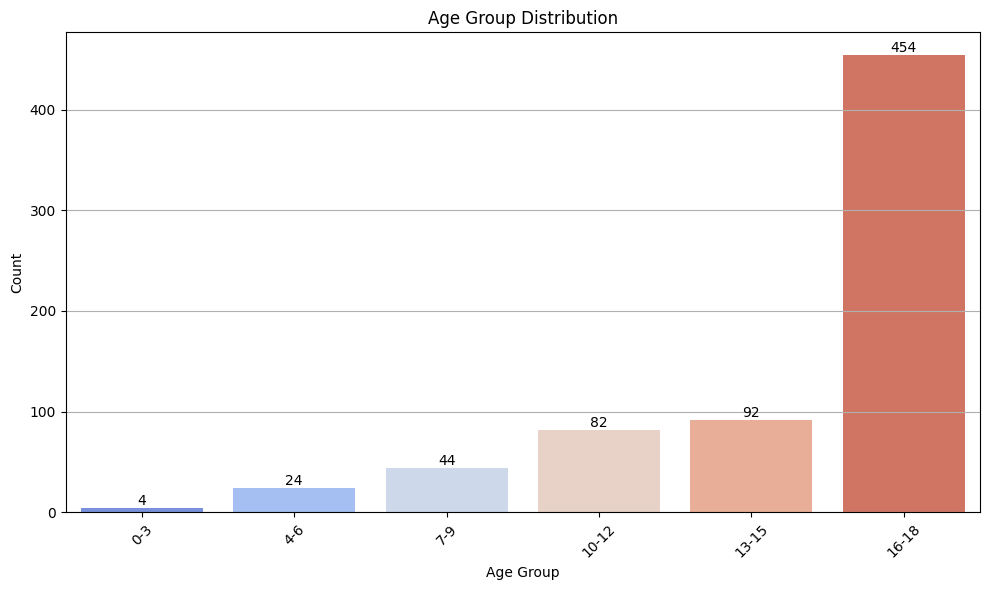

In [26]:
plot_age_group_distribution(df_RFW)